# Companies💸

* Libraries:

In [4]:
from pymongo import MongoClient
import pandas as pd
import time
import requests
import numpy as np
from bs4 import BeautifulSoup 
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import squarify

## Connecting with Mongo

In [5]:
def connect_db (database):
    client = MongoClient("localhost:27017")
    db = client["Ironhack"]
    return db.get_collection(f"{database}")


In [6]:
c = connect_db("companies")

## Filtering

### Select tech categories

* Print all categories presented in our database:

In [7]:
def show_categories (category):
    category = c.distinct(f"{category}")
    print(category)

In [8]:
show_categories("category_code")

[None, 'advertising', 'analytics', 'automotive', 'biotech', 'cleantech', 'consulting', 'design', 'ecommerce', 'education', 'enterprise', 'fashion', 'finance', 'games_video', 'government', 'hardware', 'health', 'hospitality', 'legal', 'local', 'manufacturing', 'medical', 'messaging', 'mobile', 'music', 'nanotech', 'network_hosting', 'news', 'nonprofit', 'other', 'photo_video', 'public_relations', 'real_estate', 'search', 'security', 'semiconductor', 'social', 'software', 'sports', 'transportation', 'travel', 'web']


* Filter companies related to tech:

In [5]:
filter_ = {"category_code": {"$regex": "games_video|hardware|network_hosting|software|web"}}
projection = {"name":1, "_id":0, "category_code":1, "total_money_raised":1, "offices.city":1, "offices.country_code":1 }
tech_companies = list(c.find(filter_, projection).sort("total_money_raised", -1))
tech_companies[:5]

[{'name': 'BetKlub',
  'category_code': 'games_video',
  'total_money_raised': '€91k',
  'offices': [{'city': 'Paris', 'country_code': 'FRA'}]},
 {'name': 'Karo Internet',
  'category_code': 'games_video',
  'total_money_raised': '€850k',
  'offices': [{'city': 'Cologne', 'country_code': 'DEU'}]},
 {'name': 'Tupalo',
  'category_code': 'web',
  'total_money_raised': '€77.1k',
  'offices': [{'city': 'Vienna', 'country_code': 'AUT'}]},
 {'name': 'Dodreams',
  'category_code': 'games_video',
  'total_money_raised': '€750k',
  'offices': [{'city': '', 'country_code': 'FIN'}]},
 {'name': 'kinkon',
  'category_code': 'web',
  'total_money_raised': '€750k',
  'offices': [{'city': 'Kaiserslautern', 'country_code': 'DEU'}]}]

In [6]:
#tech_companies[0]["offices"][0]["city"]

In [7]:
cities = [] 

for i in range(len(tech_companies)):
    for j in range(len(tech_companies[i]["offices"])):
        cities.append(tech_companies[i]["offices"][j]["city"])

In [8]:
countries = []

for i in range(len(tech_companies)):
    for j in range(len(tech_companies[i]["offices"])):
        countries.append(tech_companies[i]["offices"][j]["country_code"])

In [9]:
tcompanies = {
    "City": cities,
    "Country": countries
}

df = pd.DataFrame(tcompanies)

In [10]:
df = df.groupby(["Country", "City"]).size()
df = pd.DataFrame(df)

0
Country City                     
AFG     Bellevue                1
        Cerritos                1
        Salt Lake City          1
ALB     Tirana                  1
ANT     Curacao                 1
...                            ..
ZAF     Cape Town,Western Cape  1
        Eldoraign               1
        Fish Hoek               1
        Johannesburg            4
        Pretoria                1

[2068 rows x 1 columns]

In [12]:
df = df.sort_values(by=0, ascending=False)
df

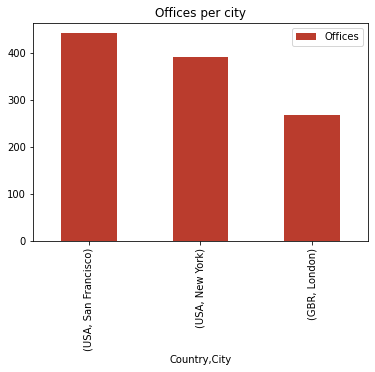

In [17]:
df = df.rename(columns={0: "Offices"})
df.head(3).plot(kind="bar", color=["#BA3C2D"], title="Offices per city");

### Scrape for deciding which is the best option for our new company

In [27]:
url = "https://moscone.com/events/game-developers-conference-2023"

In [28]:
html = requests.get(url)
html

<Response [200]>

In [29]:
soup = BeautifulSoup(html.content, "html.parser")

In [30]:
tags = soup.find_all("div", attrs = {"class":"field-rich-text"})
tags[0]

<div class="field-rich-text"><p><strong><a href="https://gdconf.com/">IN-PERSON</a> </strong>| March 20 - 24<strong> |</strong> Moscone Center | San Francisco, CA USA</p>
<p>GDC is the game industry's premier professional event, championing game developers and the advancement of their craft.</p>
<p>The Game Developers Conference (GDC) brings the game development community together to exchange ideas, solve problems, and shape the future of the industry across five days of education, inspiration, and networking. Attendees inlude programmers, artists, producers, game designers, audio professionals, and business leaders.</p></div>

In [32]:
text_description = tags[0].getText()
print(text_description)

IN-PERSON | March 20 - 24 | Moscone Center | San Francisco, CA USA
GDC is the game industry's premier professional event, championing game developers and the advancement of their craft.
The Game Developers Conference (GDC) brings the game development community together to exchange ideas, solve problems, and shape the future of the industry across five days of education, inspiration, and networking. Attendees inlude programmers, artists, producers, game designers, audio professionals, and business leaders.
